# Laboratorio 03


1. Supongamos que un conjunto de características y datos etiquetados estan dados de la siguiente manera:

Crear un data frame de pandas con los siguientes datos:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|




2. Crear una función para calcular la función de coste.

3. Asumiendo que $\theta_0=0$, represente gráficamente la función de costo para diferentes valores de $\theta_1$. Determine el valor mínimo de la función de costo y, con este valor, grafique la ecuación de regresión obtenida sobre los datos del dataframe que ha construido.



4. Suponiendo ahora que los datos de entrenamiento viene dados de la siguiente manera:

|Entrenamiento|Y| X_1 |
|-|-|-|
|0|0|0|
|1|1|1|
|2|2|2|
|3|3|3|
|4|4|4|
|m|5|5|

Encontrar la función de coste para diferentes valores de $\theta_0$, $\theta_1$.
Para ello puede emplear los metodos `surface` y `contour` dentro de la libreria de `matplotlib`.  Construya primero, con los valores de $\theta_0$, $\theta_1 $ definidos un `np.meshgrid` y evalue  para cada punto $\theta_0$, $\theta_1$ la función de coste.

Para el gráfico 3D puede emplear algo similar a las siguientes lineas de código

```
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot_surface(t0, t1, J )
ax.contour(t0, t1, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()
```


En los casos anteriores la solución solo involucra 1 y 2 parámetros para la representación de la función de coste en  2D y 3D respectivamente. Cuando se tienen más parametros a optmizar, no podemos tener una representacion gráfica, análoga a los casos anteriores. Notese además que los datos anteriores no tiene ningún ruido y solo se esta realizados  de esta manera, por motivos didácticos.

5. Encontrar la expresión teórica para la función de coste en el caso 1D y 2D.

# Gradiente Descendente


Para determinar el mínimo,  a través del gradiente descendente puede ser aplicada el siguiente algoritmo:

- Proponer un número aleatorios inicial $\omega_i$
- Para descender al mínimo de la función, encontremos un  valor para el cual
el deriva de la función descenciende, asi:
\begin{equation}
\omega_{i+1} = \omega_{i} - \alpha \frac{\mathrm{d}f(\omega_i)}{\mathrm{d}\omega}
\end{equation}

donde, $\alpha$ es conocido como la tasa de aprendizaje del algoritmo.

- Evaluar $f(\omega_{i+1})$

- Iterar hasta encontrar el mínimo de la función


6. Construya un algoritmo en el que emplee el gradiente descente para determinar el minimo de una función, determine el mínimo con una error epsilon de  1E-4, pruebe su algoritmo para $f(x)= (x-4)^2$ y al menos 3 valores de $\alpha$


7. Para responder este punto puede consultar la siguiente  página y seguir el video[Ejemplo guia: dotcsv](https://www.youtube.com/watch?v=-_A_AAxqzCg):

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

# Modelo de *machine learning*: Solución general

Un modelo general para solucionar un problema de machinine learning puede ser estructurado como sigue:


a. Eliger el modelo a emplear:
\begin{equation}
h(X,\Theta)
\end{equation}

- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:

    \begin{equation}
    h(X) = (\theta_0 + \theta_1 X)
    \end{equation}


b. Eligir la funcion de coste :
-  Metrica Ecuclidiana:
\begin{equation}
J(\Theta)=\frac{1}{2m} \sum_{i=1}^m ( h_{\theta} (X^{(i)})-y^{(i)})^2
\end{equation}
- [Lista de funciones de coste que pueden ser empleadas](https://jmlb.github.io/flashcards/2018/04/21/list_cost_functions_fo_neuralnets/)


c. Aplicar el gradiente descendente iterativamente, hasta encontrar el minimo:  

\begin{equation}
\Delta \vec{\Theta} =  - \alpha \nabla J(\Theta)
\end{equation}



- En el caso de una regresion lineal tenemos que $h(X,\Theta=(\theta_0, \theta_1))$:


\begin{equation}
\theta_0 := \theta_0 - \alpha \frac{\partial J}{\partial \theta_0}
\end{equation}

\begin{equation}
\theta_1 := \theta_1 - \alpha \frac{\partial J}{\partial \theta_1}
\end{equation}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 1.

In [3]:
df = pd.DataFrame({'Y':np.arange(0,6,1), 'X_1':np.arange(0,6,1)})
df.index.name = 'Entrenamiento'
print(df)

               Y  X_1
Entrenamiento        
0              0    0
1              1    1
2              2    2
3              3    3
4              4    4
5              5    5


# 2.

In [4]:
# Función de coste

def coste_J(theta_0, theta_1, X, Y):
    m = len(Y)
    J = (1/(2*m)) * np.sum(((theta_0 + theta_1*X) - Y)**2)
    return J

# 3.

Para los datos datos, el mínimo coste sucede cuando $\theta_1 = 1$ es decir, una recta con pendiente $1$.

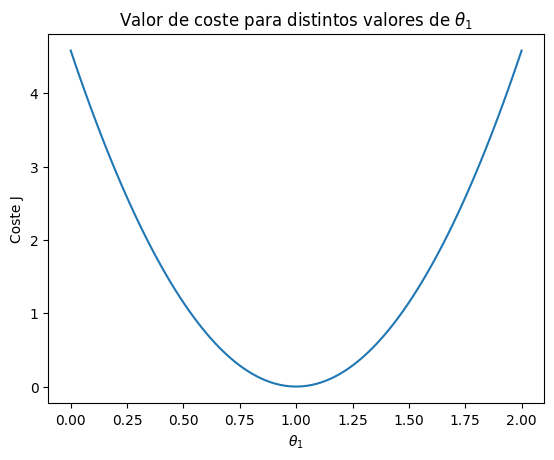

In [15]:
theta_1 = np.linspace(0,2,100)
J = np.zeros(len(theta_1))

X, Y = df['X_1'], df['Y']

for i in range(100):
    J[i] = coste_J(0,theta_1[i], X, Y)

plt.plot(theta_1, J)
plt.title(r'Valor de coste para distintos valores de $\theta_1$')
plt.xlabel(r'$\theta_1$')
plt.ylabel('Coste J')

plt.show()

# 4.

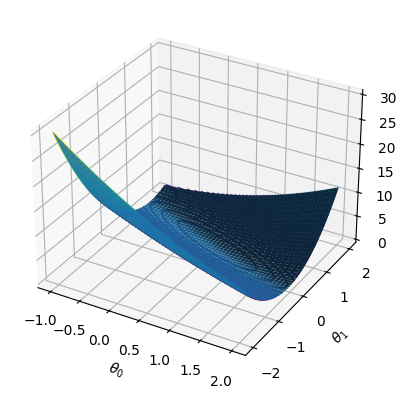

In [42]:
t0, t1 = np.linspace(-2,2,100), np.linspace(-1,2,100)

J = np.zeros((100,100))
for i in range(100):
    for j in range(100):
        J[i,j] = coste_J(t0[i], t1[j], X, Y)

t0, t1 = np.meshgrid(t0, t1)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(t1, t0, J )
ax.contour(t1, t0, J, 200,   linestyles="solid")
ax.set_xlabel("$\\theta_0$")
ax.set_ylabel("$\\theta_1$")
plt.show()

# 5.

\begin{equation*}
J_{2D}(\theta_0, \theta_1, \theta_2)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X_1 + \theta_2 X_2)- y^{(i)})^2
\end{equation*}

\begin{equation*}
J_{3D}(\theta_0, \theta_1, \theta_2, \theta_3)=\frac{1}{2m} \sum_{i=0}^m ( (\theta_0 + \theta_1 X_1 + \theta_2 X_2 + \theta_3 X_3)- y^{(i)})^2
\end{equation*}

# 6.

In [61]:
def grad_des(x, a, func, tolerancia = 1e-4):
    new_x = x - a*func(x)
    tries = 0
    while (abs(func(x)) > tolerancia):
        x = new_x
        new_x = x - a*func(x)
        tries = tries + 1
    return tries, new_x

def dev_1(x):
    return 2*(x-4)

trie1 = grad_des(2,0.1, dev_1)
trie2 = grad_des(2,0.01, dev_1)
trie3 = grad_des(2,0.001, dev_1)

print('Para alpha = 0.1, tardó {} intentos, y el resultado fue {}'.format(trie1[0],trie1[1]))
print('Para alpha = 0.01, tardó {} intentos, y el resultado fue {}'.format(trie2[0],trie2[1]))
print('Para alpha = 0.001, tardó {} intentos, y el resultado fue {}'.format(trie3[0],trie3[1]))

Para alpha = 0.1, tardó 48 intentos, y el resultado fue 3.9999643188076823
Para alpha = 0.01, tardó 525 intentos, y el resultado fue 3.999951477204903
Para alpha = 0.001, tardó 5294 intentos, y el resultado fue 3.9999501980770233


# 7.

Encontrar el mínimo de la siguiente función a través del metodo del gradiente descendente https://en.wikipedia.org/wiki/Gradient_descent:


\begin{equation}
F(x,y) = \sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y)
\end{equation}

  -  Para ello realice una gráfica de la función en 3D, y un mapa de contorno de la función.
  - Determine el valor mínimo de la función con el metodo del gradiente descendente.

\begin{align*}
\nabla F(x,y)  =& \left[ x\cos \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y) - 2\sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \sin (2x+1-e^y) \right] \hat{i} \\ &+ \left[ \frac{y}{4}\cos \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \cos (2x+1-e^y) + e^y\sin \left( \frac{1}{2}x^2-\frac{1}{4}y^2 +3\right) \sin (2x+1-e^y) \right] \hat{j} 
\end{align*}

In [12]:
def grad_2d(x,y):
    Dx = x*np.cos( 0.5*x**2-0.25*y**2 + 3) *np.cos (2*x+1-np.e**y) - 2*np.sin(0.5*x**2-0.25*y**2 + 3)*np.sin(2*x+1-np.e**y)
    Dy = 0.5*y*np.cos( 0.5*x**2-0.25*y**2 + 3) *np.cos (2*x+1-np.e**y) + np.e**y*np.sin(0.5*x**2-0.25*y**2 + 3)*np.sin(2*x+1-np.e**y)
    return Dx,Dy

def norm_grad(x,y,func=grad_2d):
    g = func(x,y)
    norm = np.sqrt(np.dot(g,g))
    return norm

def minimun_grad(coords, alpha, tolerancia=1e-9):
    x,y = coords[0], coords[1]
    norm = norm_grad(x,y)
    while norm > tolerancia:
        Dx, Dy = grad_2d(x,y)
        x = x - alpha*Dx
        y = y - alpha*Dy
        norm = norm_grad(x,y)
    return x,y

In [16]:
initial_cord = np.random.random(2)
print('Las coordenadas de un punto extremal son:')
print(minimun_grad(initial_cord, 0.001))

Las coordenadas de un punto extremal son:
(2.2017866501350576, 1.6870604570012417)
